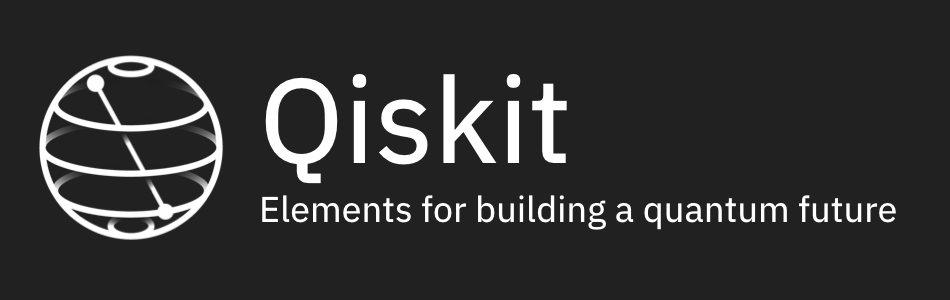

# Qiskit Aqua: Tutorial to build a pluggable algorithm/component


### Introduction

This notebook is part of the simple example of an algorithm for `Qiskit Aqua`. This sample, called `Evolution Fidelity`, illustrates how to implement an algorithm and what steps to take to configure and run it. The implementation of the algorithm itself is located in the `evolutionfidelity` directory.

### Register a pluggable algorithm/components
After you complete the algorithm implementation, there are two approaches to register your pluggable algorithm/components.

**Note: you can use the developed algorithm directly in Python without any issue.**

1. Register it permanently. 
2. Register it on-the-fly.


#### Register it permanently
If you complete the pluggable algorithm/components as a Python package, you can refer to this [instruction](https://qiskit.org/documentation/aqua/extending.html#extending-aqua) to prepare the `setup.py` file to register the pluggable algorithm/component, which will be discovered in Qiskit-Aqua. We prepared a [setup.py](evolutionfidelity/setup.py) example for this tutorial. 

Go to the `qiskit/advanced/aqua/evolutionfidelity` folder, and then do `python3 setup.py install` to install the package.

#### Register it on-the-fly
You can also register it on-the-fly. Aqua provides a function to register your pluggable algorithm/component easily. The following cell shows how to do that.

In [1]:
from qiskit.aqua import register_pluggable
from evolutionfidelity.evolutionfidelity import EvolutionFidelity
try:
    register_pluggable(EvolutionFidelity)
except Exception as e:
    print(e)

In [2]:
from qiskit import BasicAer
import numpy as np
from qiskit.aqua.operators import MatrixOperator, op_converter
from qiskit.aqua import local_pluggables, PluggableType

List all registered algorithms, and we will find `EvolutionFidelity` in the list if you registered it.

In [3]:
print(local_pluggables(PluggableType.ALGORITHM))

['QAOA.Variational', 'QGAN', 'VQC', 'VQE', 'ExactEigensolver', 'ExactLSsolver', 'SVM', 'EOH', 'QSVM', 'AmplitudeEstimation', 'MaximumLikelihoodAmplitudeEstimation', 'BernsteinVazirani', 'DeutschJozsa', 'Grover', 'HHL', 'IQPE', 'QPE', 'Shor', 'Simon', 'QEomEE', 'QEomVQE', 'EvolutionFidelity']


### Use the algorithm directly
Without registration, you can still use the designed algorithm/components as is.

In [4]:
from evolutionfidelity.evolutionfidelity import EvolutionFidelity
from qiskit.aqua.components.initial_states import Zero
from qiskit.aqua import QuantumInstance
num_qubits = 2
temp = np.random.random((2 ** num_qubits, 2 ** num_qubits))
qubit_op = op_converter.to_weighted_pauli_operator(MatrixOperator(matrix=temp + temp.T))

initial_state = Zero(qubit_op.num_qubits)

algo = EvolutionFidelity(qubit_op, initial_state, expansion_order=1)

backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend=backend)

result = algo.run(quantum_instance)
print(result['score'])

0.9420934576187111


### Use the algorithm via a declarative approach
After you register the package, you will be able to discover the algorithm declaratively.

In [5]:
from qiskit.aqua.input import EnergyInput
from qiskit.aqua import run_algorithm

params = {
    'problem': {
        'name': 'eoh'
    },
    'algorithm': {
        'name': 'EvolutionFidelity',
        'expansion_order': 1
    },
    'initial_state': {
        'name': 'ZERO'
    }
}

algo_input = EnergyInput(qubit_op)

In [6]:
result = run_algorithm(params, algo_input, backend=backend)
print(result['score'])

/Users/paul/opt/anaconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


0.9420934576187111


In [7]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright